## APENAS O COMPRESSOR, AINDA FALTA DOCUMENTAÇÃO , METRICAS E PASSAGEM/RETRIEVAL DE UM ARQUIVO

## Virão na proxima versão

In [21]:
%matplotlib inline
import cv2
import numpy as np
import pylab
from matplotlib import pyplot as plt

%matplotlib inline
pylab.rcParams['figure.figsize'] = (20.0, 7.0)

In [22]:
im = cv2.imread('barb.tif',0)
#im = im.astype(float)

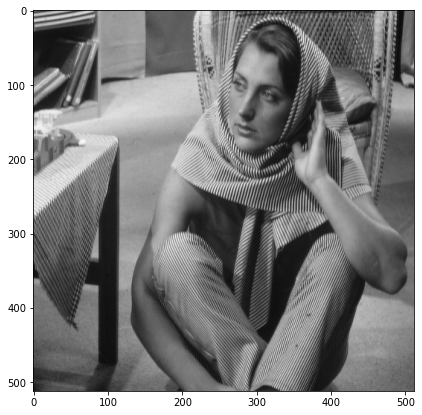

In [23]:
f = plt.figure()
plt.imshow(im,cmap='gray')

In [24]:
im = im & 0xf0

In [25]:
preHuffman = []

anterior = im[0][0]

corridas = []

corrente = 0
check = []
numCorridas = 0
for linha in im:
    for pixel in linha:
        check.append(pixel)
        if pixel == anterior:
            corrente = corrente + 1
        else:
            numCorridas = numCorridas + 1
            preHuffman.append(anterior)
            preHuffman.append(corrente)
            corridas.append(corrente)
            corrente = 0 
            anterior = pixel

preHuffman.append(anterior)
preHuffman.append(corrente)

corridas.append(corrente)

corridas[0] = corridas[0]-1
preHuffman[1] = preHuffman[1] -1

preHuffman = np.array(preHuffman)
        
        

In [26]:
import collections

In [27]:
counter = collections.Counter(preHuffman)

In [28]:
symb2count = dict(counter)

In [29]:
total = sum(counter.values())

In [30]:
symb2freq = {k: v/total for k, v in symb2count.items()}

In [31]:
from heapq import heappush, heappop, heapify
from collections import defaultdict
def encode(symb2freq):
    """Huffman encode the given dict mapping symbols to weights"""
    heap = [[wt, [sym, ""]] for sym, wt in symb2freq.items()]
    heapify(heap)
    while len(heap) > 1:
        lo = heappop(heap)
        hi = heappop(heap)
        for pair in lo[1:]:
            pair[1] = '0' + pair[1]
        for pair in hi[1:]:
            pair[1] = '1' + pair[1]
        heappush(heap, [lo[0] + hi[0]] + lo[1:] + hi[1:])
    return sorted(heappop(heap)[1:], key=lambda p: (len(p[-1]), p))

In [32]:
huff = encode(symb2freq)
huff = dict([tuple(a) for a in huff])

In [33]:
postHuffman =''
for item in preHuffman:
    postHuffman = postHuffman + huff[item]

In [34]:
len(postHuffman)

903286

In [ ]:
inverseHuff = {v: k for k, v in huff.items()}

In [ ]:
item = ''
encodedImage = []
contador =0
for bit in postHuffman:
    item = item + str(bit)
    item = str(item)
    if item in inverseHuff.keys():
        encodedImage += [inverseHuff[item]]
        item = ''
    

In [ ]:
decodedImage = []
dupla =0
pixelValue= 0
corridaCount = 0
corrida = []

for item in encodedImage:
    if (dupla ==0):
        pixelValue =item
        dupla = 1
    else:
        decodedImage.extend([pixelValue] * (item+1))
        dupla = 0

In [ ]:
reconstructedImagem = np.array(decodedImage).reshape(im.shape)

In [ ]:
f = plt.figure()
plt.imshow(reconstructedImagem,cmap='gray')